**Problem Statement**:
Housing price prediction in chennai region

1.   Buyers-This model will help to indentity a fair price for the home
2.   Seller-This model will give insights to sellers as to how to build homes that fetch them more money(important factors that contribute to price)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

In [ ]:
import warnings
warnings.filterwarnings("ignore")   #to ignore the warning 

In [ ]:
pd.set_option('display.max_columns', 30)
data= pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Assesments/main/Chennai%20houseing%20sale.csv")
data.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


In [ ]:
data.columns

#PRT_ID 
#'MZZONE' -a means agriculture,rm-resendential medium,c-commercial
#QS rating 

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
data.shape  
# we have 22 columns 
#2925 rows or records

(7109, 22)

In [ ]:
data.describe()
# we can see some missing values in count

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
#making a copy of orginal dataset
df=data

# Data cleaning 

Handling Missing value 

In [ ]:
df.isnull().sum()

#N_BEDROOM ,N_BATHROOM,QS_overall columns have missing values 

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
# it is better to drop this rows rather than imputing as no of missing is very low compared to dataset
df=df.dropna() #drops all na values 

In [ ]:
df.shape

(7056, 22)

Handling Formatting error 

In [ ]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
# Renaming all the column names in lowercase letters
df.columns = df.columns.str.lower()

In [ ]:
#date sale and date build column is of format str
df["date_sale"] = pd.to_datetime(df["date_sale"], format='%d-%m-%Y')
df["date_build"] = pd.to_datetime(df["date_build"], format='%d-%m-%Y')

In [ ]:
df["n_bedroom"]=df["n_bedroom"].astype(int)
df["n_bathroom"]=df["n_bathroom"].astype(int)

Handling categorical columns

In [ ]:
df.area= df.area.str.lower()  #converting all the string in area column to lower case
df["area"].unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [ ]:
# Correcting the spelling mistakes in area columns
df["area"]= df.area.replace({'velchery':'velachery', 'kknagar':'kk nagar', 'tnagar':'t nagar', 'chormpet':'chrompet', 
                       'chrompt':'chrompet', 'chrmpet':'chrompet', 'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar','karapakam':'karapakkam', 'adyr':'adyar'})

In [ ]:
df["sale_cond"].unique()  #there are two abnormal ,two adj land,partial

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
# Renaming all the string in sale_cond column names in lowercase letters
df["sale_cond"]=df["sale_cond"].str.lower()
df["sale_cond"].unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [ ]:
df["sale_cond"]= df["sale_cond"].replace({'adj land':'adjland', 
                       'partiall':'partial',
                       'ab normal':'abnormal'})

In [ ]:
df["sale_cond"].unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale'],
      dtype=object)

In [ ]:
df.park_facil.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
# Renaming all the string in park_facil column names in lowercase letters
df.park_facil = df.park_facil.str.lower()
# Correcting the spelling mistakes in park_facil columns
df.park_facil = df.park_facil.replace({'noo':'no'})

In [ ]:
df.buildtype.unique() #2others and 2 commercial

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
# Renaming all the string in buildtype column names in lowercase letters
df.buildtype = df.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
df.buildtype = df.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})

In [ ]:
df.utility_avail = df.utility_avail.str.lower()
df.utility_avail.unique()

array(['allpub', 'elo', 'nosewr ', 'nosewa', 'all pub'], dtype=object)

In [ ]:
# Correcting the spelling mistakes in utility_avail columns
df.utility_avail = df.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})  #no idea about what is nosewa

In [ ]:
# Renaming all the string in street column names in lowercase letters
df.street = df.street.str.lower()
df.street.unique()

array(['paved', 'gravel', 'no access', 'pavd', 'noaccess'], dtype=object)

In [ ]:
# Correcting the spelling mistakes in street columns
df.street = df.street.replace({'pavd':'paved', 'noaccess':'no access'})

In [ ]:
# Renaming all the string in mzzone column names in lowercase letters
df.mzzone = df.mzzone.str.lower()
df.mzzone.unique() 

array(['a', 'rh', 'rl', 'i', 'c', 'rm'], dtype=object)

Creating new columns needed for our analysis 

In [ ]:
#pd.DatetimeIndex(df["date_sale"]).month
pd.DatetimeIndex(df["date_sale"]).year    #with datetimeindex object we can perform year,month,day etc operations 
#pd.DatetimeIndex(df["date_sale"]).dayofweek

Int64Index([2011, 2006, 2012, 2010, 2009, 2014, 2007, 2006, 2011, 2006,
            ...
            2011, 2010, 2010, 2010, 2010, 2011, 2004, 2006, 2009, 2005],
           dtype='int64', name='date_sale', length=7056)

In [ ]:
# Creating property_age column which deternine how old the property id
df['property_age'] = pd.DatetimeIndex(df.date_sale).year - pd.DatetimeIndex(df.date_build).year

# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
df['total_price'] = pd.DataFrame(df.reg_fee	+ df.commis	+ df.sales_price)

# Rearranging the columns of dataframe 
df= df.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])

df.head(3)

,prt_id,area,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,date_build,date_sale,property_age,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,total_price
0,P03210,karapakkam,abnormal,yes,commercial,allpub,paved,a,1967-05-15,2011-05-04,44,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,P09411,anna nagar,abnormal,no,commercial,allpub,gravel,rh,1995-12-22,2006-12-19,11,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,P01812,adyar,abnormal,yes,commercial,elo,gravel,rl,1992-02-09,2012-02-04,20,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408


# Exploratory Data analysis 

In [ ]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
x=df.corr(method="pearson")

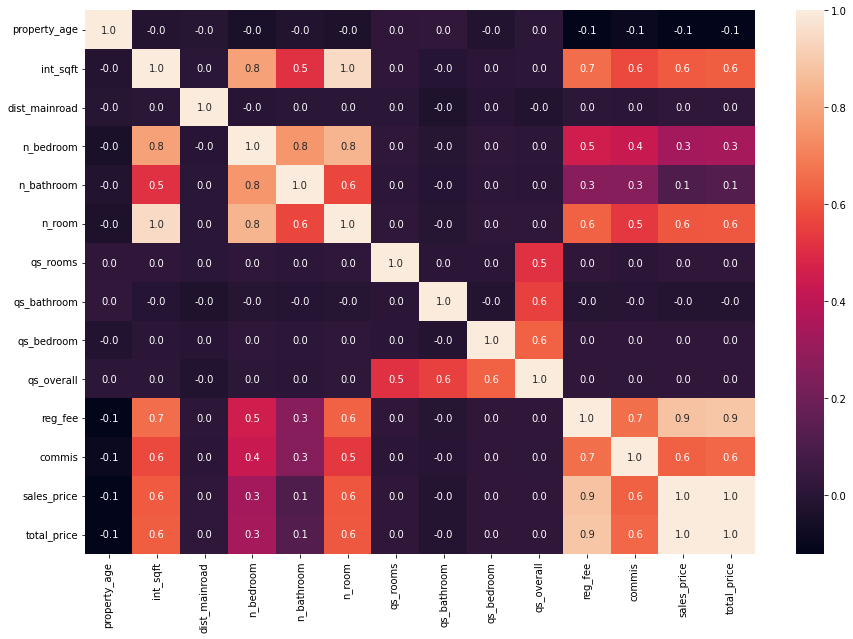

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt='.1f')

From the pot above we can see


1.   numeric columns such as int_sqrt,n_room,reg_fee,commis,sales_price have good positive correlation with total price




Plotting Features column vs Target column
Here we plot two type of data:
1.   Numerical Columns
2.   Categorical Columns








Plotting of Numerical data vs Target

Here we are plotting all our Numerical columns with total price of the house to figure out, is there any relation between numerical features column and total sales.
Here we plot 2 type of numerical data:

1.   Continous variable
2.   numerical variable

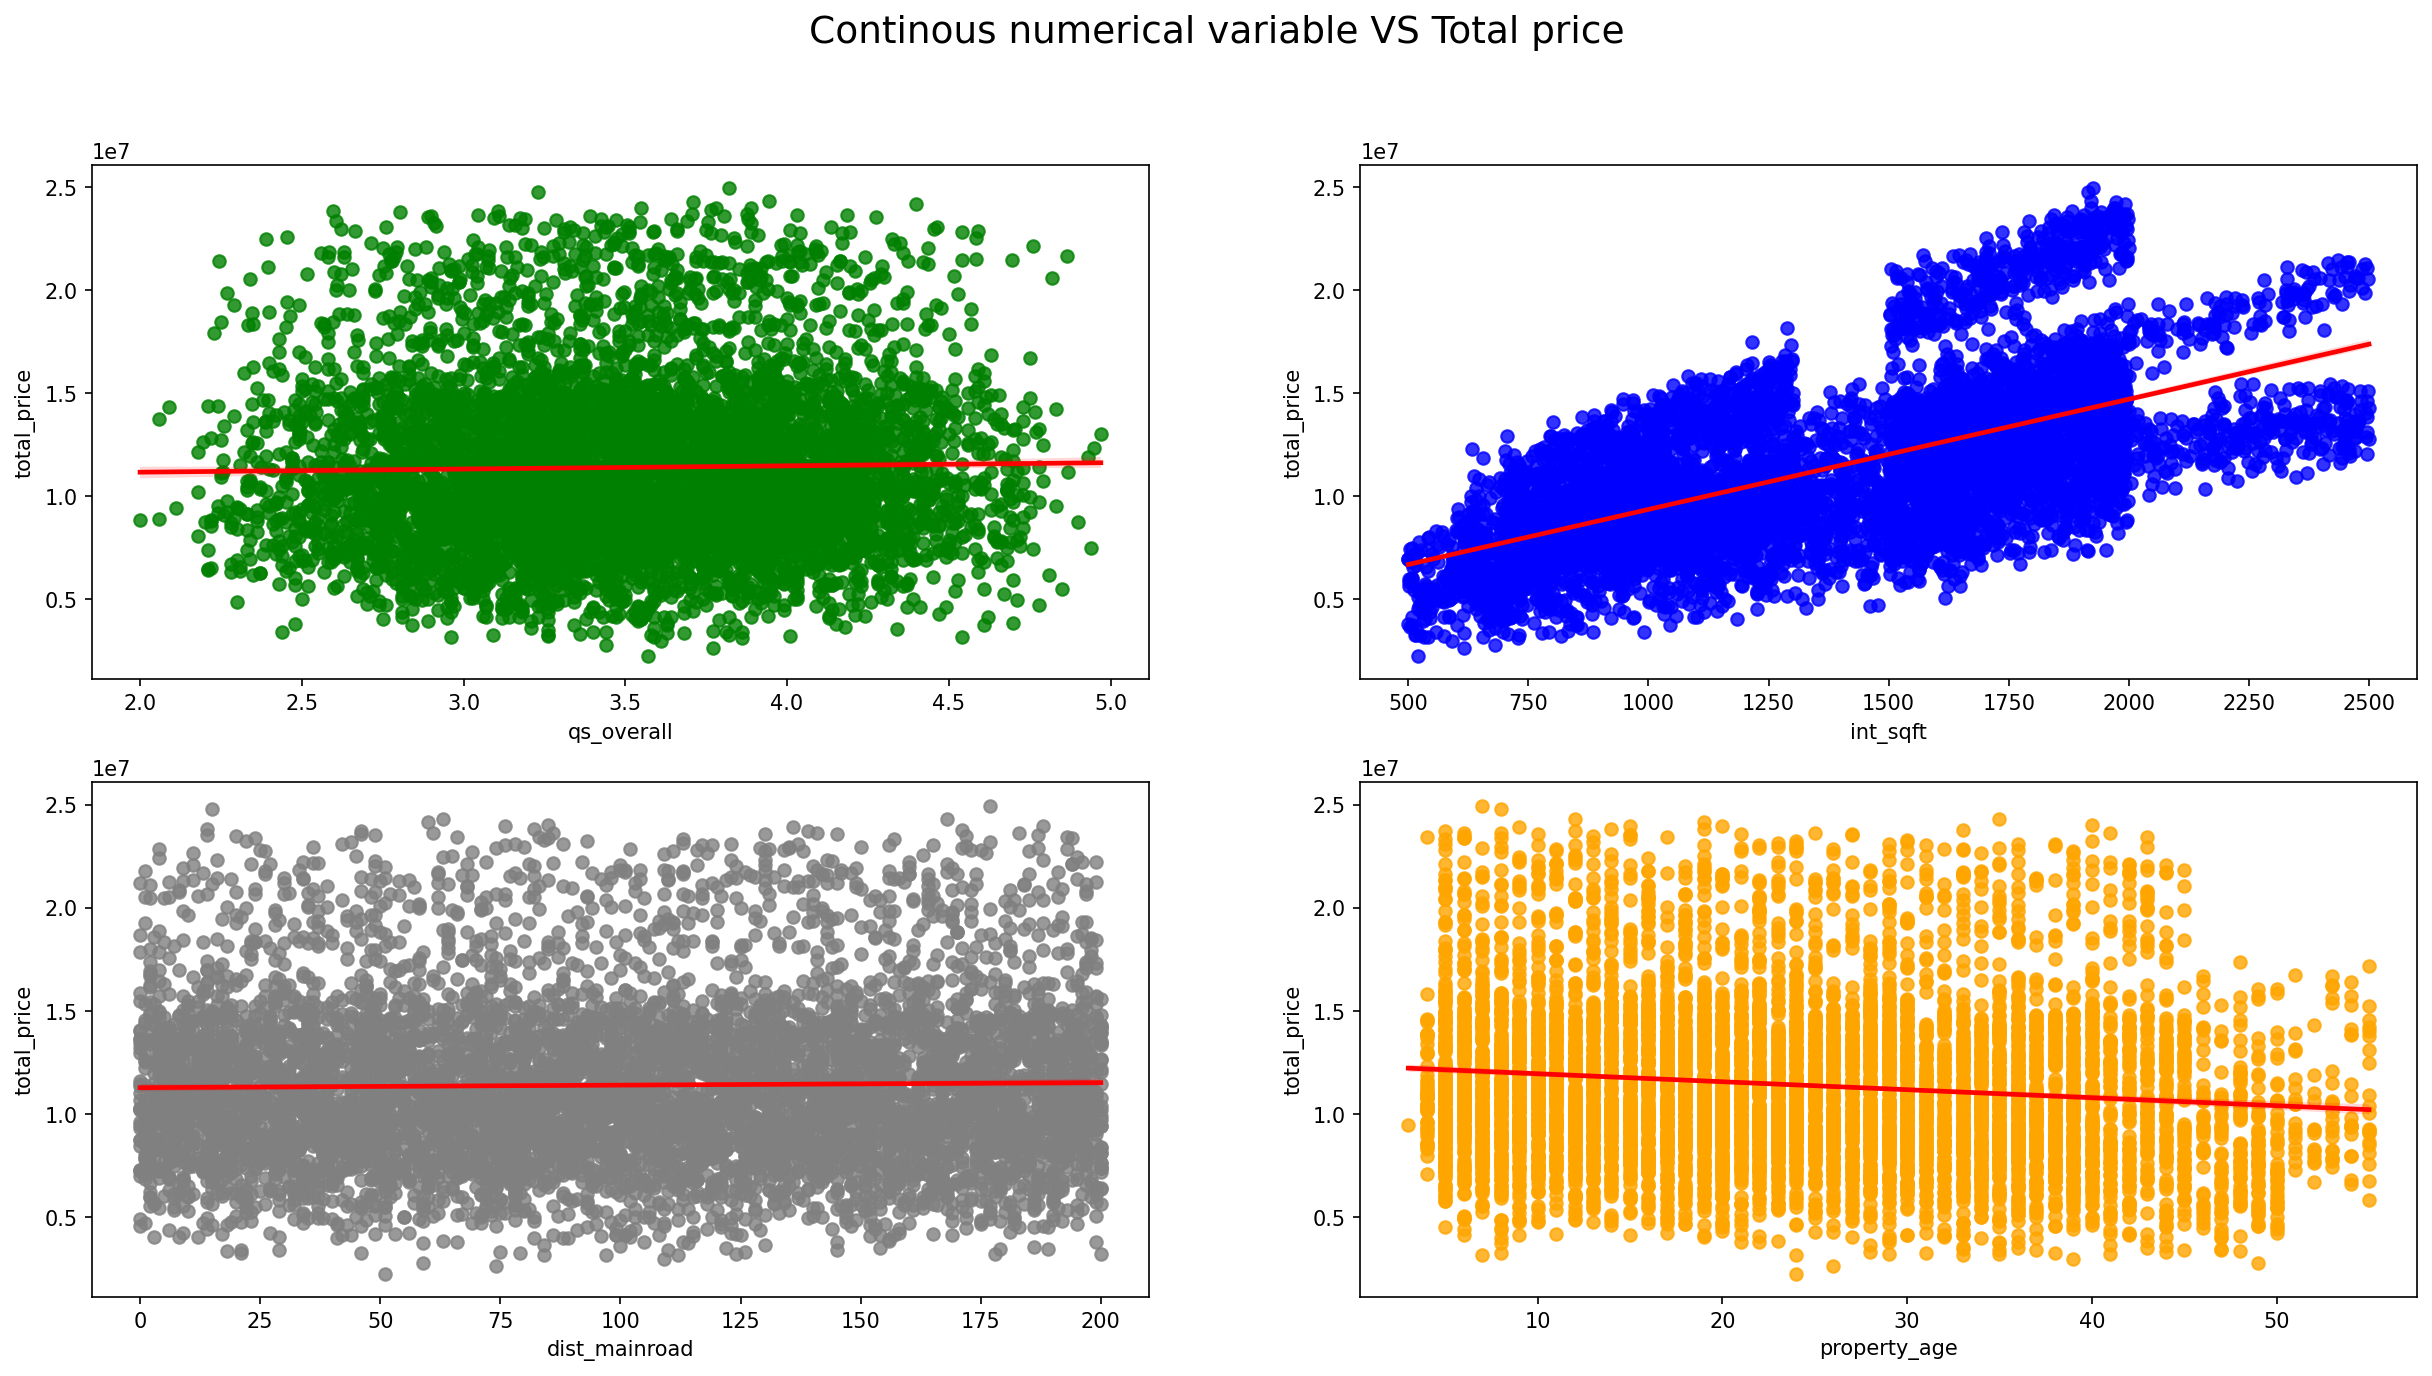

In [ ]:
plt.figure(figsize=(20, 10), dpi=150)
#regplot--->plot data and a linear regression model fit.
plt.subplot(2,2,1)
sns.regplot(df.qs_overall, df.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df.int_sqft, df.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df.dist_mainroad, df.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df.property_age, df.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)  #suptitle to show title for overall plot 
plt.show()

Interpretation:- we find some regression line are constant total price

Here we can come to conclusion that:

*   In qs_overall we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.(as qs_overall increases total price remains constant)
*   In int_sqft we find good relation so this feature will be very important for us so we will keep it.
*   In dist_mainroad we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In property_age we find small relation so this feature will be useful for us so we will keep it.

2) Decsrete numerical variable

Here we are plotting all our Decsrete numerical variable columns with total price of the house to figure out, is there any relation between Decsrete numerical variable features column and total sales.

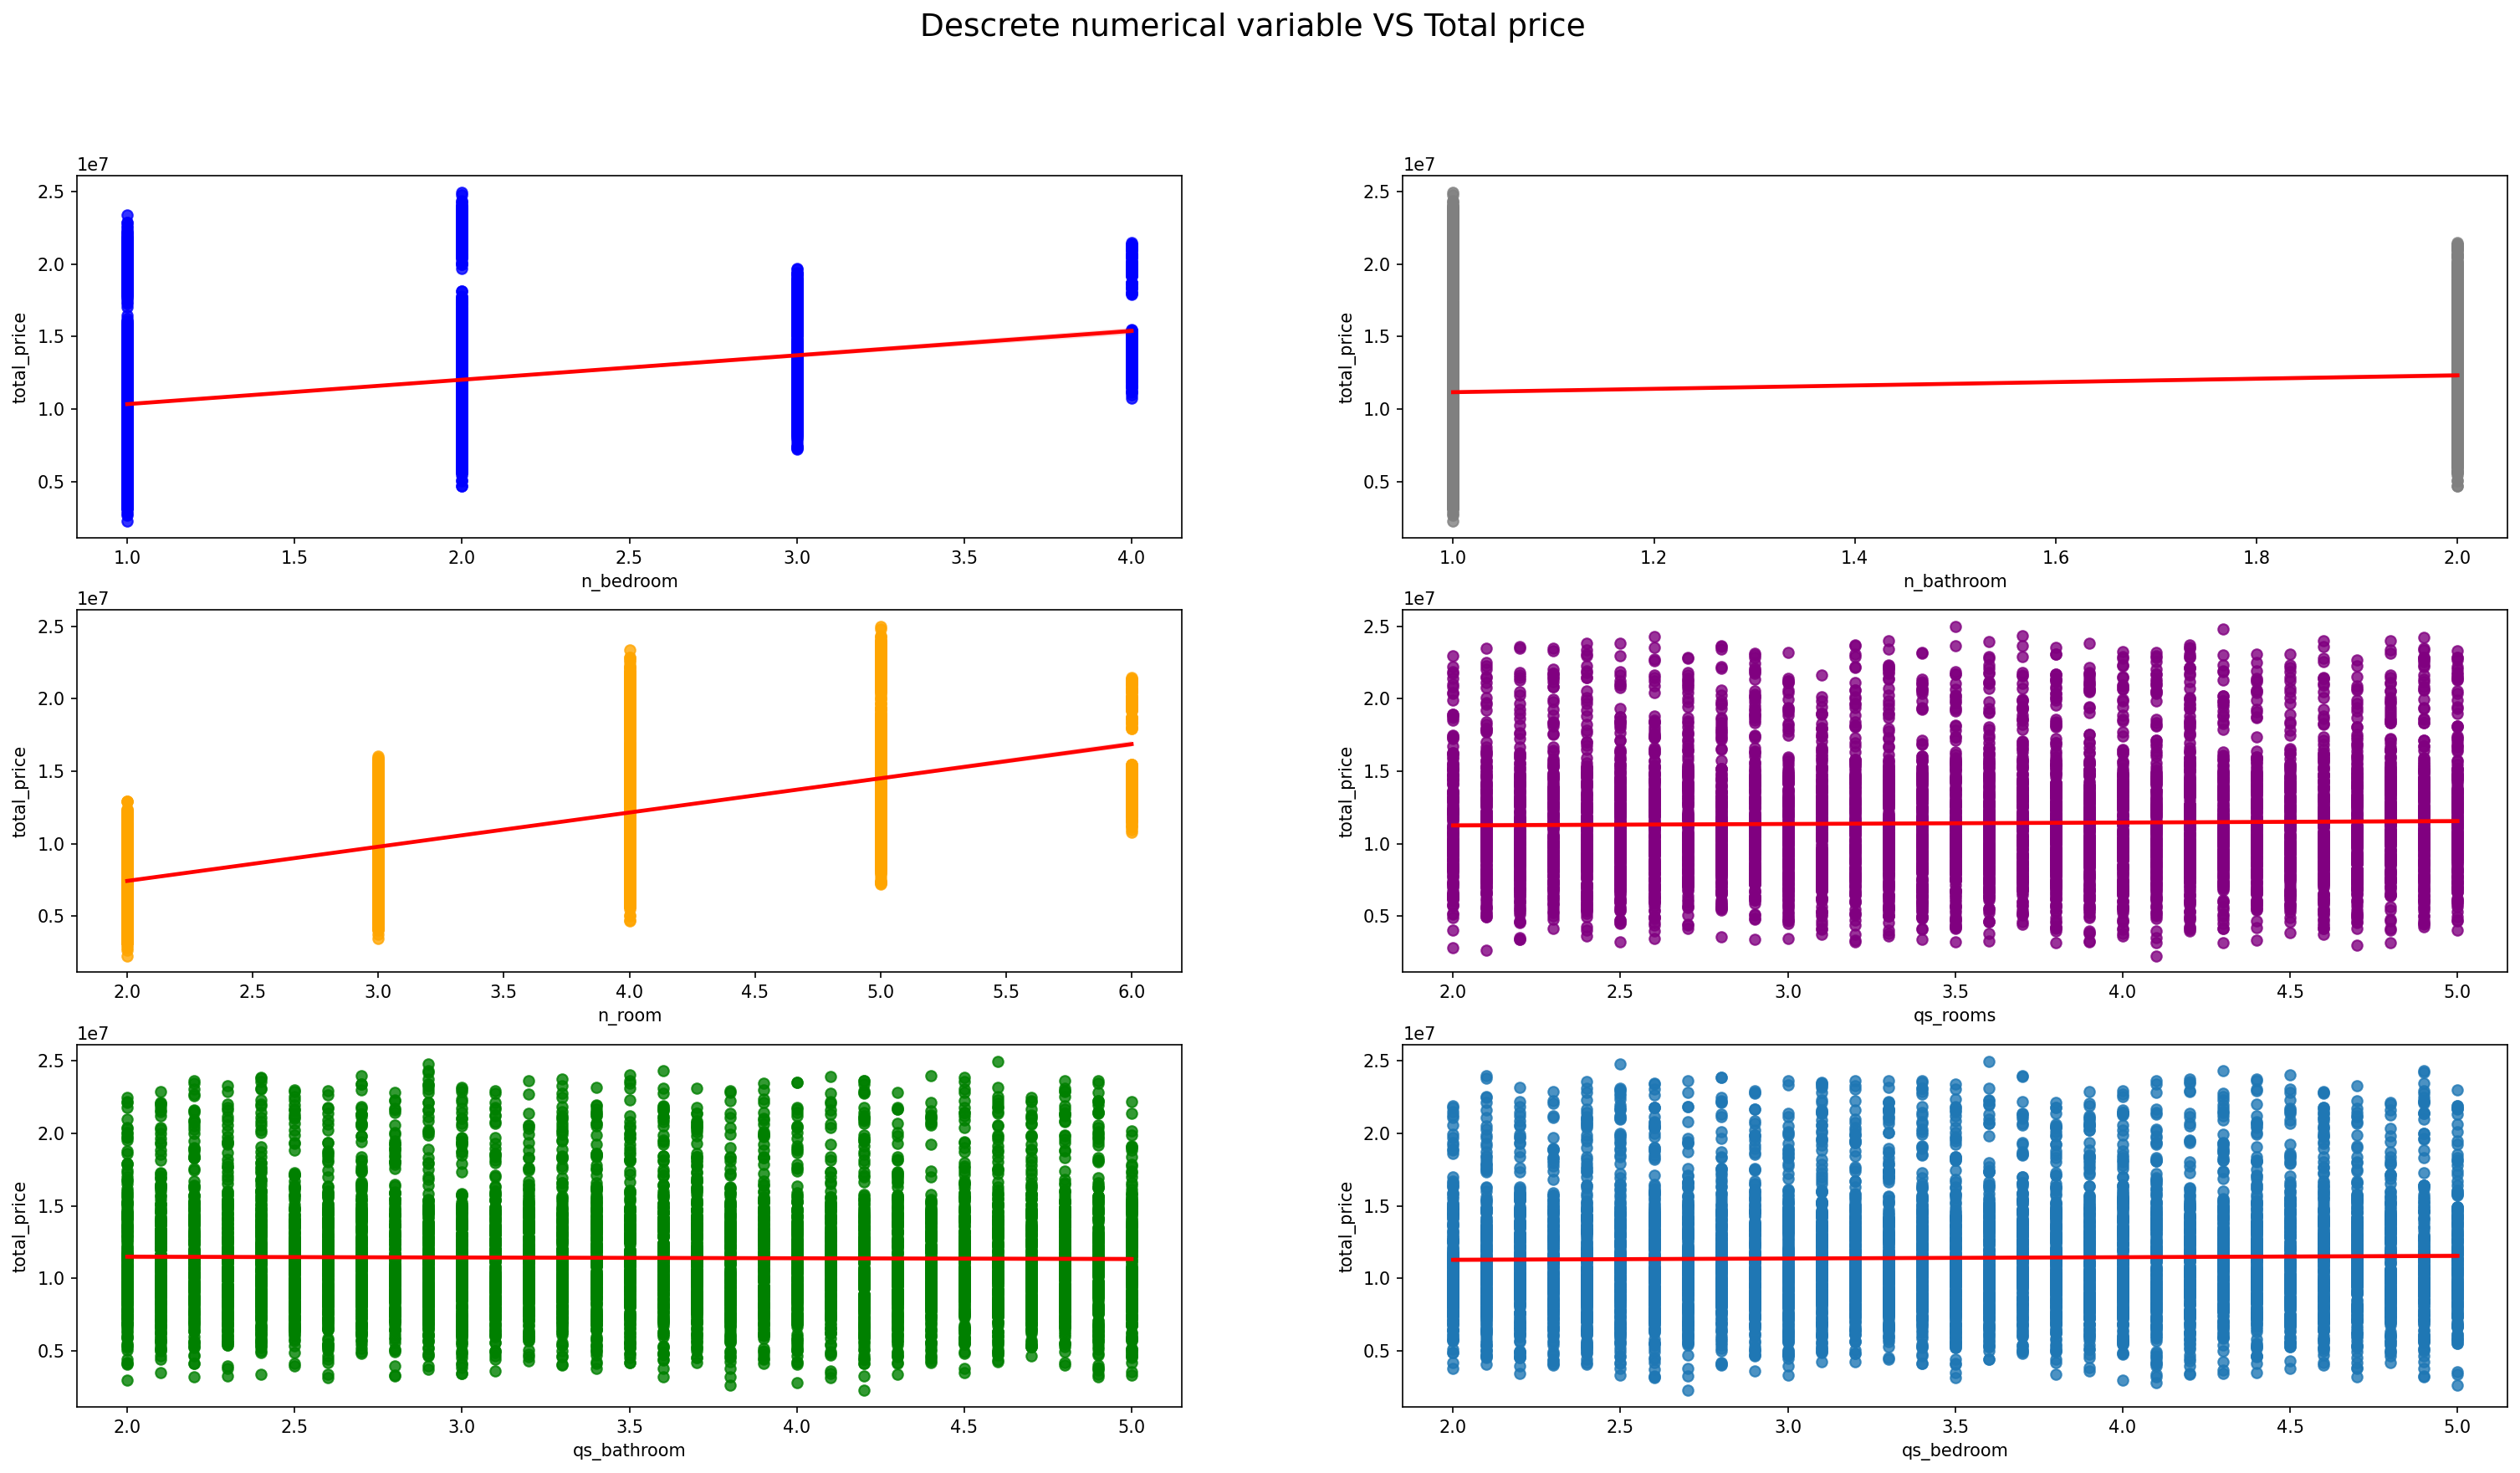

In [ ]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot(3,2,1)
sns.regplot(df.n_bedroom, df.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(3,2,2)
sns.regplot(df.n_bathroom, df.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(3,2,3)
sns.regplot(df.n_room, df.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot(3,2,4)
sns.regplot(df.qs_rooms, df.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot(3,2,5)
sns.regplot(df.qs_bathroom, df.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(3,2,6)
sns.regplot(df.qs_bedroom, df.total_price, line_kws={"color": "red"})

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()

Interpretation:- 

Here we can come to conclusion that:

*   In n_bedroom we find good relation so this feature will be very important for us so we will keep it.
*   In n_bathroom we find small relation so this feature will be useful for us so we will keep it.
*   In n_room we find good relation so this feature will be very important for us so we will keep it.
*   In qs_rooms we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In qs_bathroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In qs_bedroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

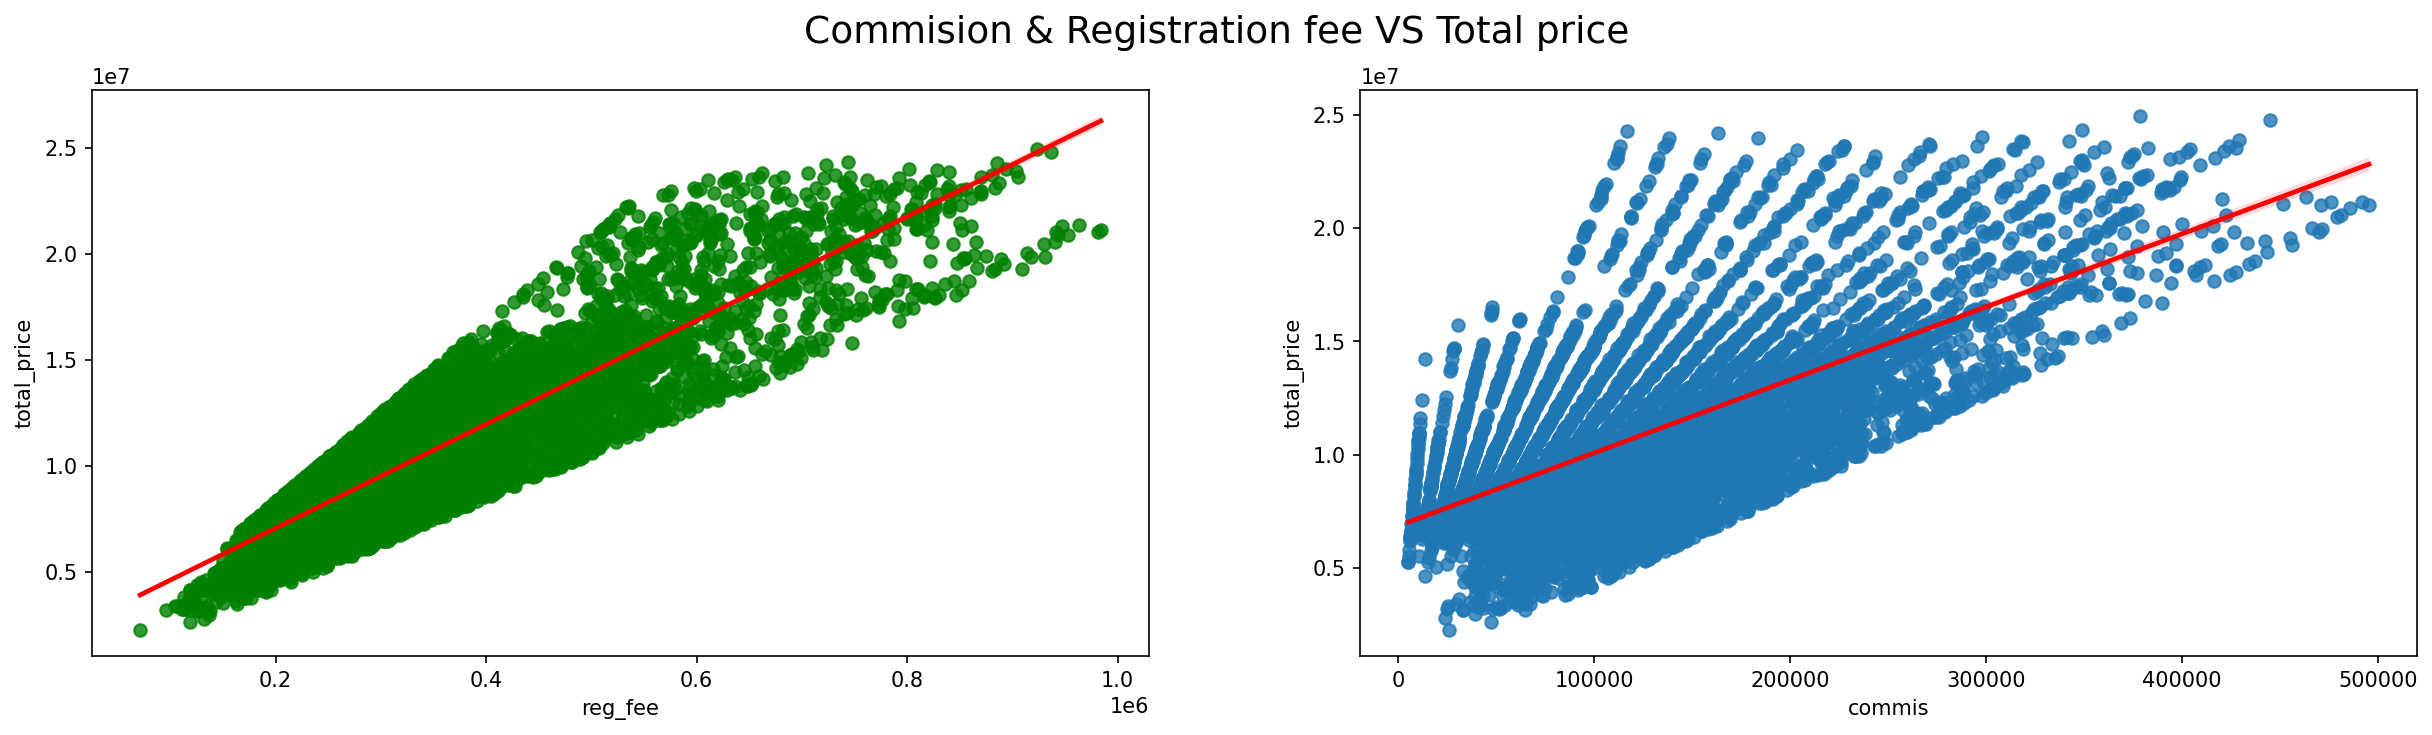

In [ ]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(df.reg_fee, df.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(df.commis, df.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

**Categorical Columns** 

Plotting of Categorical data vs Target

Here we are plotting all our catagorical columns with total price of the house to figure out, is there any relation between catagorical features column and total price column.

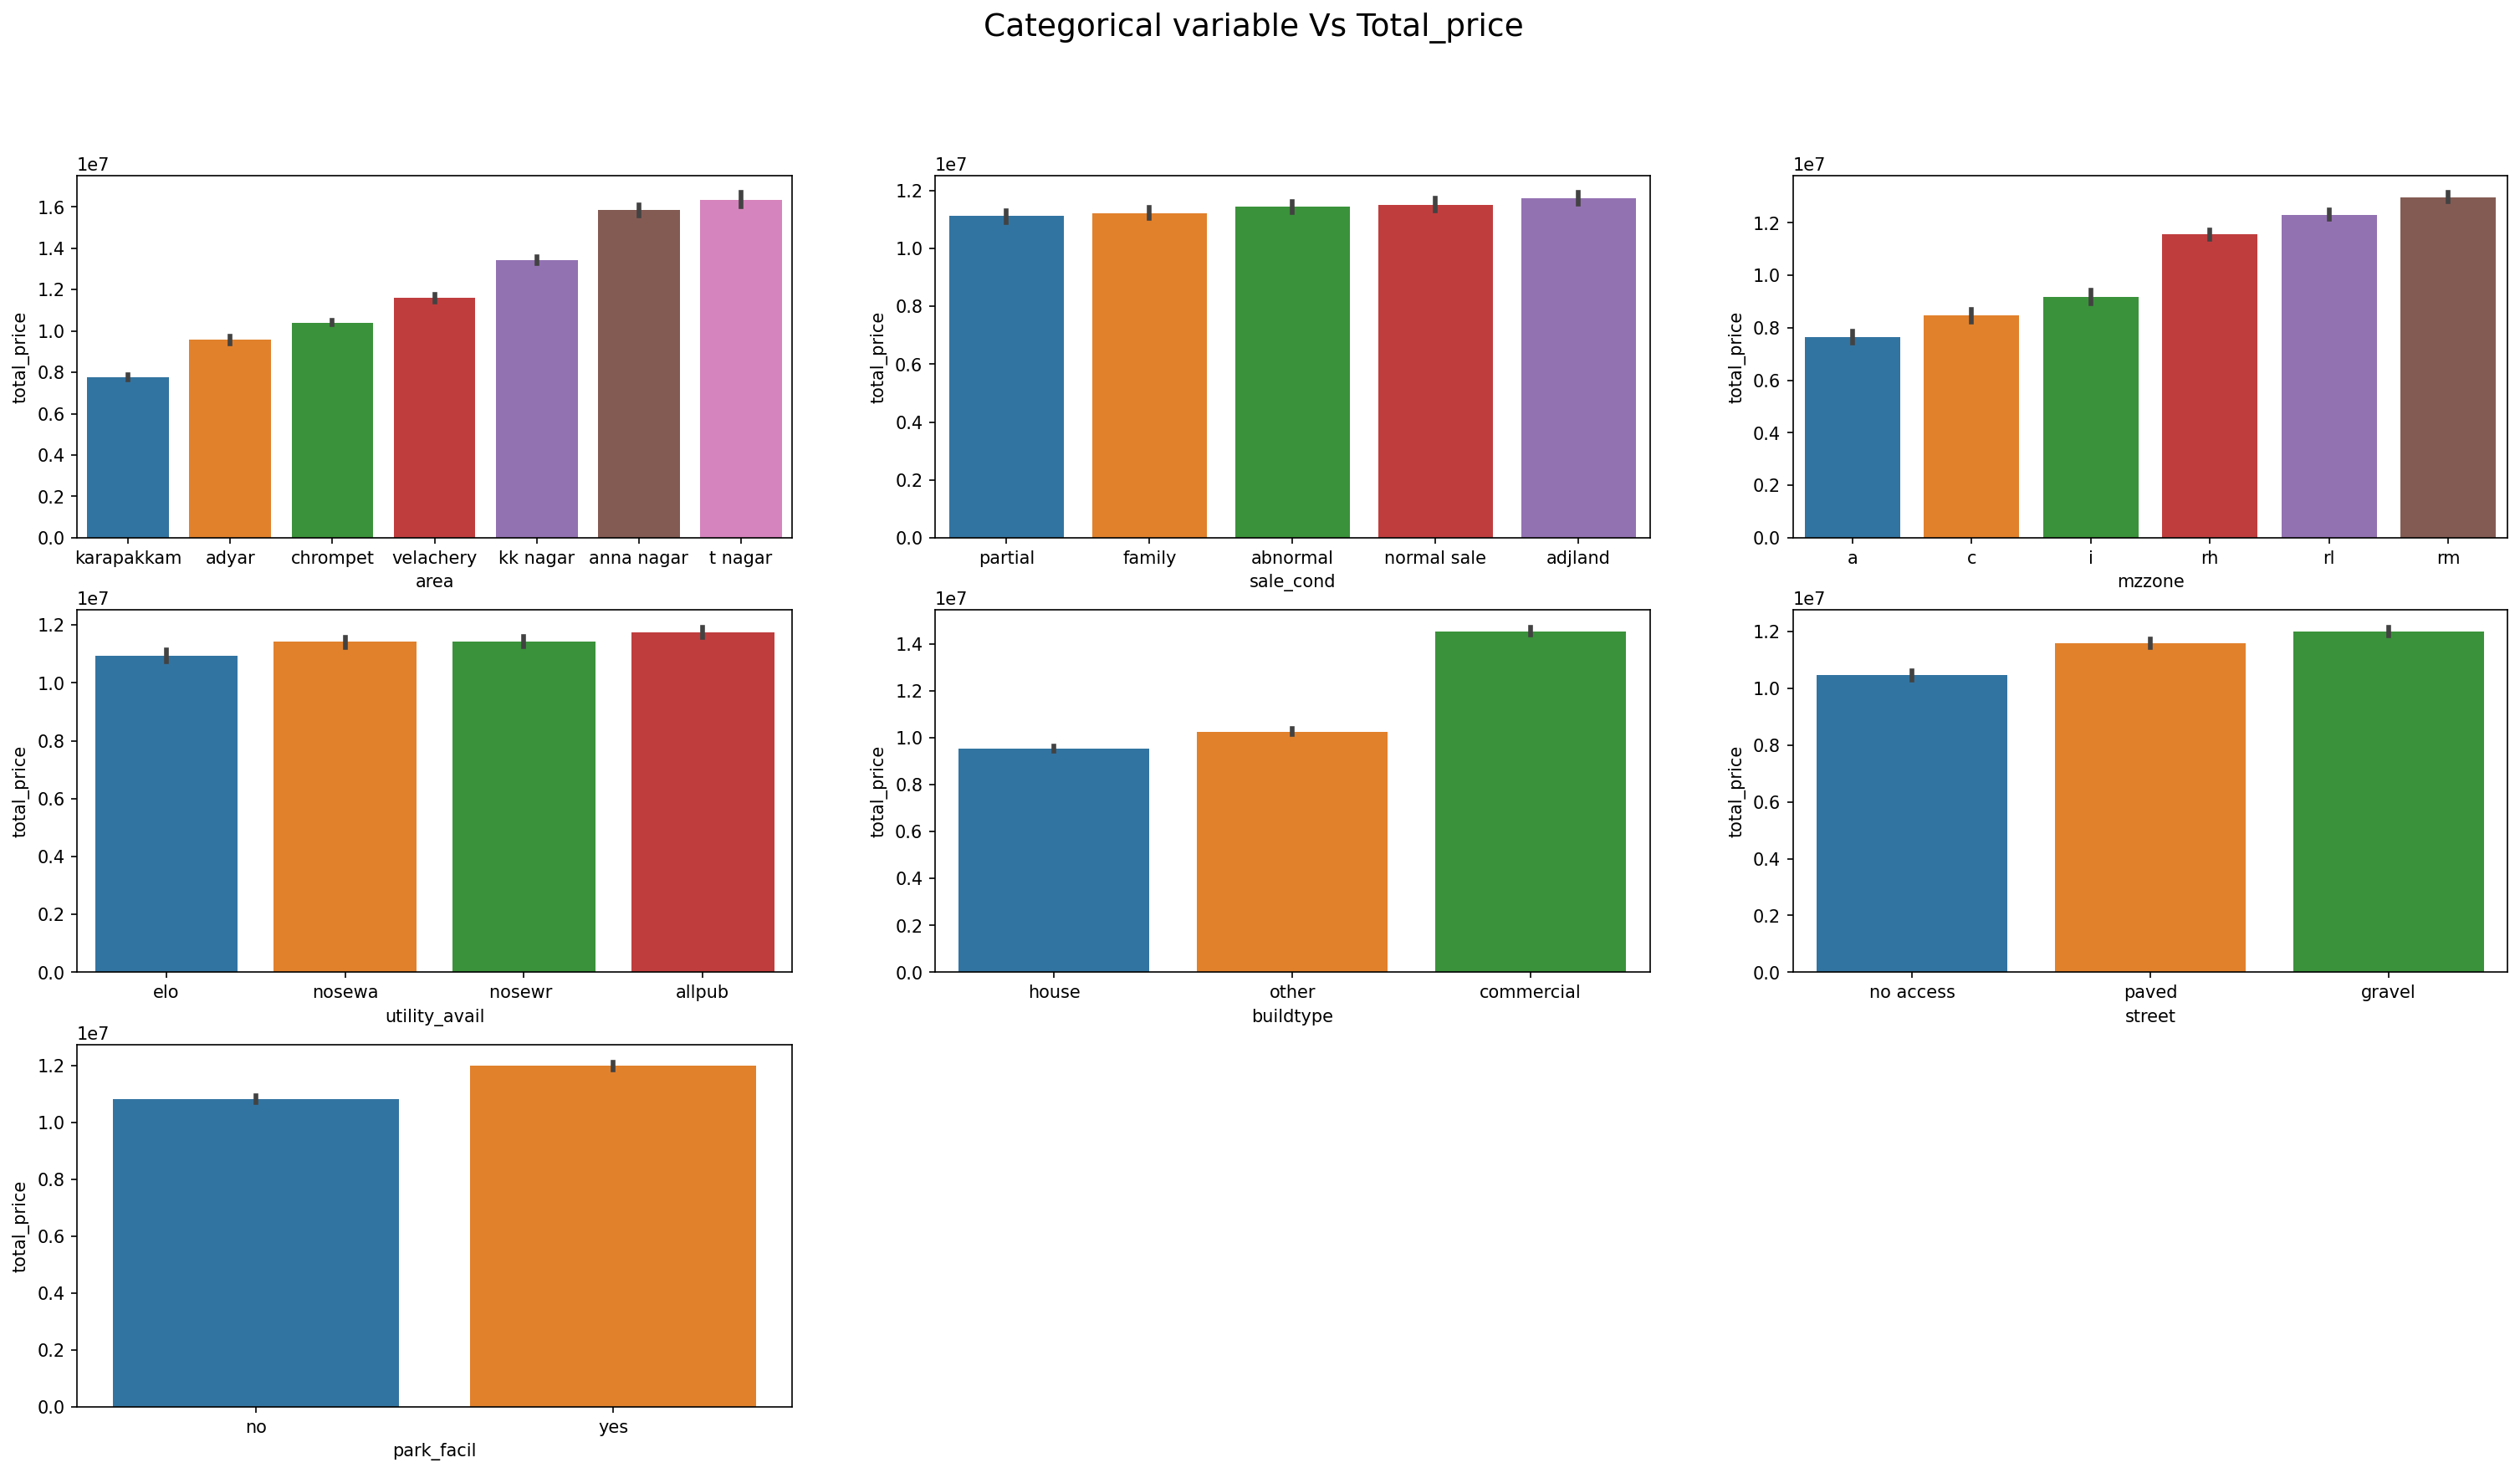

In [ ]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot(3,3,1)
sns.barplot(x=df.area,y=df.total_price,data=df,order=df.groupby("area")["total_price"].mean().reset_index().sort_values("total_price")["area"])

plt.subplot(3,3,2)
sns.barplot(x=df.sale_cond,y=df.total_price,order=df.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot(3,3,3)
sns.barplot(x=df.mzzone,y=df.total_price,order=df.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot(3,3,4)
sns.barplot(x=df.utility_avail,y=df.total_price,order=df.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot(3,3,5)
sns.barplot(x=df.buildtype,y=df.total_price,order=df.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot(3,3,6)
sns.barplot(x=df.street,y=df.total_price,order=df.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot(3,3,7)
sns.barplot(x=df.park_facil,y=df.total_price,order=df.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Categorical variable Vs Total_price", fontsize=18)
plt.show()

Interpretation:- 

Here we can come to conclusion that:

*   In area when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In sale_cond when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In mzzone when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In utility_avain when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In buildtype when we sort column in respect of total_price we didn't find linear relation in this categorical feature but it may beimportant for us so we will keep it and do OneHotEncoding on this column data.
*   In street when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In park_facil when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

# Encoding 

**OneHotEncoder**

Here we are encoding nominal categorical columns which don't have any order present in them with OneHotEncoder. But to be simple we have just used get_dummies feature from pandas.

In [ ]:
df= pd.get_dummies(df,columns=['buildtype'])

In [ ]:
df.columns

Index(['prt_id', 'area', 'sale_cond', 'park_facil', 'utility_avail', 'street',
       'mzzone', 'date_build', 'date_sale', 'property_age', 'int_sqft',
       'dist_mainroad', 'n_bedroom', 'n_bathroom', 'n_room', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price', 'total_price', 'buildtype_commercial', 'buildtype_house',
       'buildtype_other'],
      dtype='object')

**Label Encoder (Mapping)**

Here we are encoding ordinal categorical columns which have some order present in them and we havr to preserve the order so here we use Lebel/Ordinal encoder. So, for simplicity i have just simply mappes the values in order of the data.

In [ ]:
# Encoding the area column order-wise 
df.area = df.area.map({'karapakkam': 1,'adyar': 2, 'chrompet' : 3,'velachery' : 4,'kk nagar' : 5, 'anna nagar' : 6,'t nagar' : 7})
# Encoding the sale_cond column order-wise 
df.sale_cond = df.sale_cond.map({'partial' : 1, 'family' : 2, 'abnormal' : 3, 'normal sale' : 4,'adjland' : 5})

# Encoding the park_facil column order-wise 
df.park_facil = df.park_facil.map({'yes':1,'no':0})

# Encoding the utility_avail column order-wise 
df.utility_avail = df.utility_avail.map({'elo' : 1, 'nosewa' : 2, 'nosewr ' : 3,'allpub' : 4})
                                          
# Encoding the street column order-wise 
df.street =df.street.map({'no access' : 1,'paved' : 2, 'gravel' : 3})

# Encoding the mzzone column order-wise 
df.mzzone = df.mzzone.map({'a' : 1,'c' : 2,'i' : 3,'rl' : 5,'rh' : 4,'rm' : 6})

In [ ]:
# Removing unnecessary features which has negligible relation with total_price
df.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [ ]:
input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'total_price'

input = df[input_cols].copy()  #input features 
target = df[target_cols].copy()  #target values

# Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2)

# Scaling the data

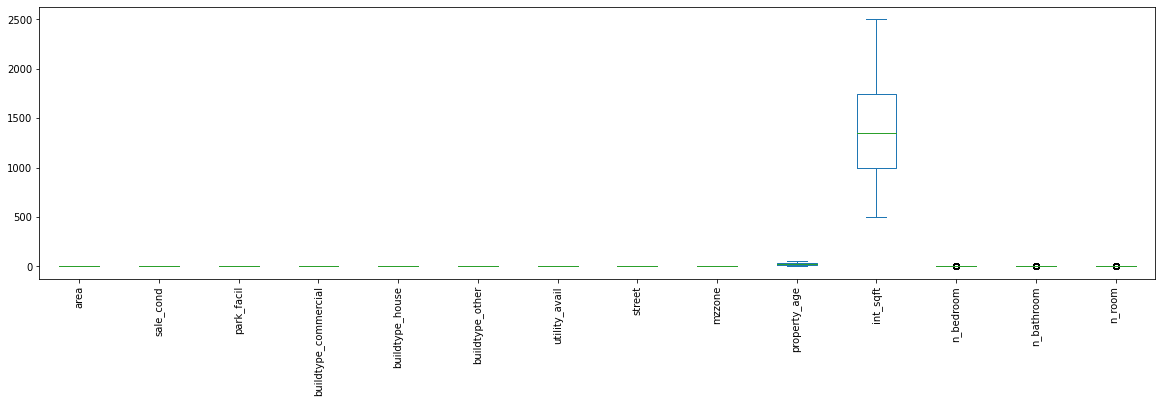

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

**Interpretation:-**

Here we can clearly see in our features column int_sqft is the only feature which which contains very large value and all the remaining of the feature column are pretty small.


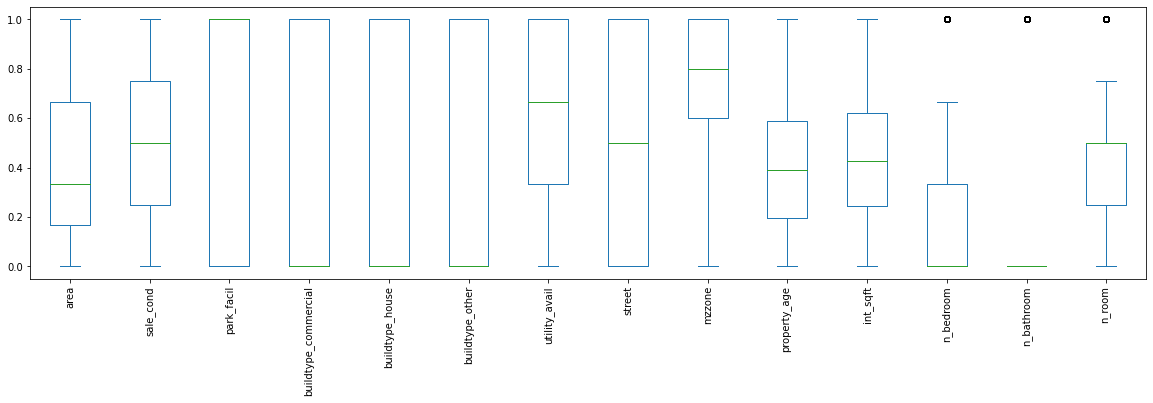

In [ ]:
#applying min max scaler standardatisation --> xscaled=x-xmin/xmax-xmin
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler().fit(X_train)    
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

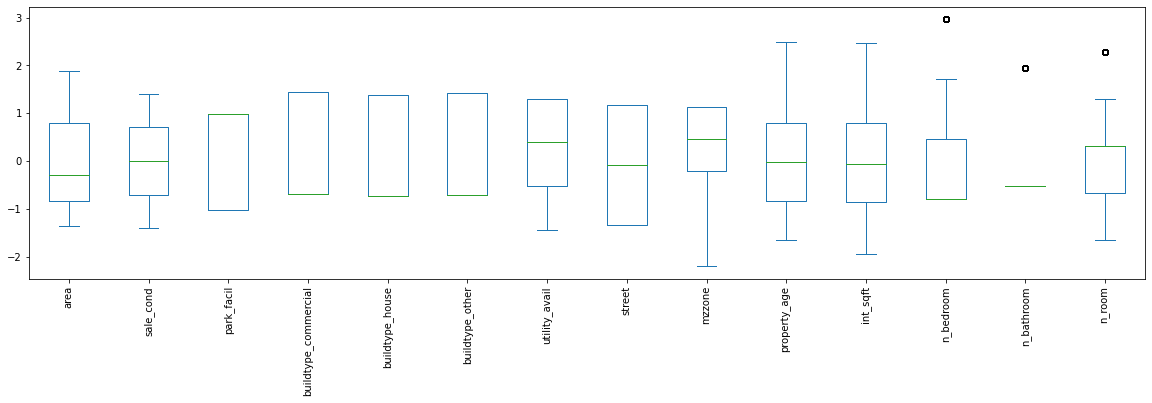

In [ ]:
from sklearn.preprocessing import StandardScaler  #x-mean/std
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

#Training the models 

LINEAR REGRESSION



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics   #-->r2 score
#without scaling
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
#after the standard scaling 
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
#after min max scaling 
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE: 0.9275897485062352
R2- SCORE(Standardscaler): 0.9275953151811637
R2- SCORE(Minmaxscaled): 0.9275897485062352


KNN REGRESSION

Orange and Blue depict RSME for MinMaxScaler and standard scaler


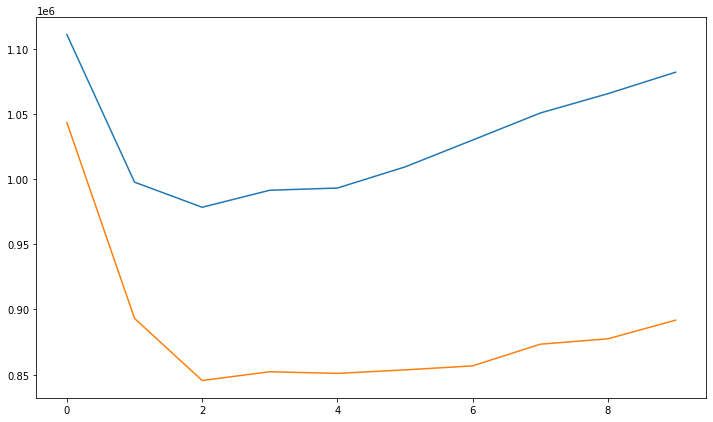

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from math import sqrt

#finding best value for k using mse 
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)  #for mm

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)  #for ss

print('Orange and Blue depict RSME for MinMaxScaler and standard scaler')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors=100)  #mandatory to scale KNN 
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.4259500287816482
R2- SCORE(Minmaxscaled): 0.9408351072532491
R2- SCORE(Standardscaler): 0.9551080274275868


DECISION TREE

In [ ]:
#this is a overfitted model 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.9729329086389209
R2- SCORE(Minmaxscaled): 0.9735481350395655
R2- SCORE(Standardscaler): 0.9729036655241433


In [ ]:
#reducing overfitting using max_depth hyperparameter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.metrics import  r2_score

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,15,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("depth  :",depth,"  " , "Cross val score:  " ,np.mean(valAccuracy))

depth  : 1    Cross val score:   0.3637538706882795
depth  : 2    Cross val score:   0.6879821548270235
depth  : 3    Cross val score:   0.7938076564573183
depth  : 4    Cross val score:   0.8784878127110158
depth  : 5    Cross val score:   0.9130060265944377
depth  : 6    Cross val score:   0.9337985151589813
depth  : 7    Cross val score:   0.948717462827639
depth  : 8    Cross val score:   0.9588120886516134
depth  : 9    Cross val score:   0.965262583761804
depth  : 10    Cross val score:   0.9685104389828719
depth  : 11    Cross val score:   0.9702931670132798
depth  : 12    Cross val score:   0.9702351257175146
depth  : 15    Cross val score:   0.9705549385857337
depth  : 20    Cross val score:   0.9701265445155688
depth  : 40    Cross val score:   0.970299796102946
depth  : 60    Cross val score:   0.9705944858922061


In [ ]:
# as the depth increases the cross val increases and the model becomes overfit 
#let me restrict the model at depth=6
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6)  
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))


R2- SCORE: 0.939363939047356
R2- SCORE(Minmaxscaled): 0.9393914639476899
R2- SCORE(Standardscaler): 0.9393802278693851


ENSEMBLE TECHNIQUES 

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 10, max_features='sqrt')  #100 models 
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.9799297311258235
R2- SCORE(minmaxscaled): 0.9794007674650426
R2- SCORE(Standardscaler): 0.9796369187673587


In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: buildtype_commercial Importance: 0.23
Variable: area                 Importance: 0.22
Variable: int_sqft             Importance: 0.18
Variable: n_room               Importance: 0.11
Variable: mzzone               Importance: 0.07
Variable: buildtype_house      Importance: 0.06
Variable: n_bedroom            Importance: 0.05
Variable: buildtype_other      Importance: 0.04
Variable: park_facil           Importance: 0.01
Variable: street               Importance: 0.01
Variable: property_age         Importance: 0.01
Variable: n_bathroom           Importance: 0.01
Variable: sale_cond            Importance: 0.0
Variable: utility_avail        Importance: 0.0


**Interpretation:**

Top factors that affect the price are 


1.   area
2.   buildtype_commercial
3.   int_sqft





In [ ]:
# New random forest with only the three most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, max_depth = 10, max_features='auto')

X_important_train = X_train[["area","buildtype_commercial","int_sqft"]]  #top three features are
y_important_train= y_train
X_important_test=X_test[["area","buildtype_commercial","int_sqft"]]
y_important_test= y_test
# Train the random forest
rf_most_important.fit(X_important_train,y_important_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(X_important_test)

r2_score(predictions,y_important_test)  # it is best we do with all features because R2-score has decreased

0.8999817552449215

XG BOOST

In [ ]:
import xgboost as xgb
for lr in [0.1,0.2,0.3,0.4,0.5,0.7,0.6,0.8,0.9,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.9915541423371518  Test score :  0.9906925724473099
Learning rate :  0.2  Train score :  0.996642475374782  Test score :  0.9958609802249018
Learning rate :  0.3  Train score :  0.9968885615136375  Test score :  0.9959331784769893
Learning rate :  0.4  Train score :  0.9964801298220878  Test score :  0.9955826211251059
Learning rate :  0.5  Train score :  0.9970879365740101  Test score :  0.9960615360892097
Learning rate :  0.7  Train score :  0.9972300602774432  Test score :  0.9961935990915269
Learning rate :  0.6  Train score :  0.9971492840556337  Test score :  0.9961199541825067
Learning rate :  0.8  Train score :  0.9973384905284479  Test score :  0.9961297459922163
Learning rate :  0.9  Train score :  0.9973686388569871  Test score :  0.9964245405823192
Learning rate :  1  Train score :  0.9975061614812577  Test score :  0.9960758770829691


In [ ]:
xg = xgb.XGBRegressor(learning_rate =0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9960615360892097
R2- SCORE(MinMaxScaler): 0.9960611096321227
R2- SCORE(Standardscaler): 0.9960755448983998


**Interpretation**

Here after training all kinds of model we can see that MinMaxScaled or StandardScaled data model doesn't matter make much difference they give very similar results. But we can surely say that  XGBRegressor outperformed most of the machine learning model 



*   XGBRegressor gives score of 0.997693 as R2-score.
*   RandomForestRegressor gives score of 0.9867256 as R2-score.
*   Decision tree regressor gives a score of 0.93 as R2-score
*   KNeighborsRegressor gives score of 0.952777 
*   LinearRegression gives score of 0.923446 as R2-score.